# Lesson 3.5

## Topics:
 - Strings
 - File Handling
 - Importing packages
 - Basic plotting
 
### Let us do some string manipulation!

 - Count the occurance of a substring
 - Length of a string

In [1]:
histone_h3 = "MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA"
count = histone_h3.count('K') + histone_h3.count('R') + histone_h3.count('H')

percent_positive = count*100/len(histone_h3)

print("Histone H3 percent positive:", percent_positive)

Histone H3 percent positive: 24.264705882352942


In [2]:
gapdh = "MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE"
count = gapdh.count('K') + gapdh.count('R') + gapdh.count('H')

percent_positive = count*100/len(gapdh)

print("GAPDH percent positive:", percent_positive)

GAPDH percent positive: 13.73134328358209


### Starts with/ Ends with
str.startswith(prefix[, start[, end]])<br>
str.endsswith(prefix[, start[, end]])

In [9]:
fasta_file=">histone_H3\nMARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA"
fasta_lines = fasta_file.split('\n') #Two lines in the fasta file, let us separate the lines
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        #seq_name = i.lstrip('>') #Let us remove the ">" symbol
        seq_name = i.replace(">",'')
    else:
        seq = i
print("Seq name:\t"+seq_name+"\nSeq:\t"+seq)

Seq name:	histone_H3
Seq:	MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA


### Find
str.find ( prefix [ , start [ , end ] ] )

In [8]:
seq.find('E',47)

50

### Replace
- str.replace(character to be replaced, replacement, count)
- if count not specified, all instances replaced

Let us find the reverse complement of a DNA sequence

In [10]:
seq = "AUGCCAUGUUGTC"
if "U" in seq: #if it is RNA, let us change it to DNA before it gets degraded
    better_seq = seq.replace('U','T')
#Now reverse complement:
rev_better_seq = better_seq[::-1]
print(seq)
print(better_seq)
print(rev_better_seq)
#Now use replace again?

AUGCCAUGUUGTC
ATGCCATGTTGTC
CTGTTGTACCGTA


### What kind of characters does my string have?
 - isalpha() - are all the characters alphabets?
 - isnumeric() - are all characters numeric?

In [12]:
seq = "ATGCATCGA"
seq.isalpha()

True

#### One way to check it is only a DNA sequence


In [17]:
input_seq = "ATAGAGCUUU"
tmp_seq = input_seq
tmp_seq = tmp_seq.replace("A","").replace("T","").replace("G","").replace("C","")
print(tmp_seq)
#tmp_seq = tmp_seq.replace("A","")
#tmp_seq = tmp_seq.replace("T","")
#tmp_seq = tmp_seq.replace("G","")
#tmp_seq = tmp_seq.replace("C","")
if(len(tmp_seq)>0):
    print("Non DNA alphabets detected")
else:
    print("Sequence seems like DNA")

UUU
Non DNA alphabets detected


### strip, rstrip and lstrip

- Default - remove whitespace from beginning, end, or both sides 
- For rstrip, lstrip - all combinations of characters in the chars argument are removed from the right/left of the string until first mismatch.

In [23]:
seq1 = " ATGC  ATGC "
print("\""+seq1.strip()+"\"")
seq1 = "ATGATGC "
seq2 = "Test this sentence"
print(seq1.rstrip())
print(seq2.rstrip('enceasdasda'))
print(seq2.rstrip('secen'))
random_string = 'this is good'

print(random_string.rstrip('do'))

"ATGC  ATGC"
ATGATGC
Test this sent
Test this sent
this is g


## A real life problem

Sequencing reads from Illumina platform are stored as fastq files. Each sequencing "read" gets four lines. Here is an example:

`@SRR036139.1 11_26_8:5:1:749:1421 length=36
GCTGGCTGCGTCTGTGGTGGGTTTCATGTTAAGGTC
+SRR036139.1 11_26_8:5:1:749:1421 length=36
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII`

Description from FASTQ wiki page:
 - Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
 - Line 2 is the raw sequence letters.
 - Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
 - Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.
 
### We want to determine the GC content of the reads in any FASTQ file. 
GC content could tell you about any bias in the library or if you are sequencing a new species for example, it tells you the properties of the species' genome. So, if you have a fastq file, how would you determine the GC content of the reads?

- Somehow get the sequences from the file into a data structure you learned
- Examine the sequence to get GC content
- Present the data

In [24]:
# How to get the sequences from the file into your code?
# First, let us open a dummy file
a_file = open('a_simple_file.txt', 'r' )
a_file.close()

### open() command
 - Two inputs - filename, mode
 - Mode can be 
     - 'r' for read
     - 'w' for write (overwrites existing file)
     - 'a' for append (adds to existing file)
 "a_file" is an object in which the whole file is stored

In [25]:
a_file = open('a_simple_file.txt', 'r' )
type(a_file)

_io.TextIOWrapper

In [26]:
#print every line
a_file = open('a_simple_file.txt', 'r' )
for line in a_file:
    print(line)
a_file.close()

This is a simple file

You can use this file to understand how python file commands work



In [27]:
#What is the variable "line"?
a_file = open('a_simple_file.txt', 'r' )
for line in a_file:
    print(type(line))
a_file.close()

<class 'str'>
<class 'str'>


In [28]:
#How do we track line numbers?
line_no = 0
a_file = open('a_simple_file.txt', 'r' )
for line in a_file:
    line_no += 1
    print(line_no,line)
a_file.close()

1 This is a simple file

2 You can use this file to understand how python file commands work



In [29]:
#Split into words, count the words
a_file = open('a_simple_file.txt', 'r' )
for line in a_file:
    lineL = line.split()
    print(lineL, "\nno. of words in this line: ", len(lineL))
a_file.close()

['This', 'is', 'a', 'simple', 'file'] 
no. of words in this line:  5
['You', 'can', 'use', 'this', 'file', 'to', 'understand', 'how', 'python', 'file', 'commands', 'work'] 
no. of words in this line:  12


To get GC content of the sequences in a fastq file:
 - Find the line with sequence
 - Get the GC content
 
When you write new code, don't apply it to actual data in the beginning - the data may be complicated enough for you to not be able to judge if your code is running properly. Instead, start with a toy model - something that will give you a trivial result. For example, here is a toy fastq file that has only two sequences with GC content of 100% and 50%:<br>
`@TEST1
GCGCGCGCGCGC
+TEST1
IIIIIIIIII
@TEST2
ATGCATGCATGC
+TEST2
IIIIIIIIIIII`

In [34]:
seqs={} # A dictionary to store sequences if needed later
gc_content={} # A dictionary to store GC content if needed later
line_no = 0 # Variable to count lines
fastq_file = open('toy.fastq', 'r' ) #Open the fastq file
for line in fastq_file: # Iterate through the fastq file
    line = line + " "
    line=line.rstrip()
    line_no+=1 #counting line numbers
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        key = int((line_no-2)/4) # Convert the line_no to a sequence ID
        seqs[key] = line #Populate seqs dictionary
        letters = list(line) #Get each letter of the sequence
        #gc=0 # Initialize gc for THIS sequence
        #for i in letters: # Iterate through the letters of the sequence
        #    if(i == "G" or i == "C"): #Check if it is G or C
        #        gc+=1 
        #Another option:
        gc = line.count('G') + line.count('C')
        gc=round(gc*100/len(letters),2) #make it percentage, make it look pretty with round()
        gc_content[key] = gc
        print(key+1,line,gc) #print the results

1 GCGCGCGCGCGC 100.0
2 ATGCATGCATGC 50.0


In [ ]:
#line=line.rstrip()

Let us try the real data now. (First 250 sequences from the SRA file: SRR036139

In [35]:
#Let us write sequence details in a file called "seq_details.txt"
fh = open("seq_details.txt","w")
seqs={} # A dictionary to store sequences if needed later
gc_content={} # A dictionary to store GC content if needed later
line_no = 0 # Variable to count lines
fastq_file = open('example.fastq', 'r' ) #Open the fastq file
for line in fastq_file: # Iterate through the fastq file
    line=line.rstrip() #get that pesky newline out
    line_no+=1 #counting line numbers
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        key = int((line_no-2)/4) # Convert the line_no to a sequence ID
        seqs[key] = line #Populate seqs dictionary
        letters = list(line) #Get each letter of the sequence
        gc=0 # Initialize gc for THIS sequence
        for i in letters: # Iterate through the letters of the sequence
            if(i == "G" or i == "C"): #Check if it is G or C
                gc+=1 
        gc=round(gc*100/len(letters),2) #make it percentage, make it look pretty with round()
        gc_content[key] = gc
        #print(key+1,line,gc) #print the results
        write_str = str(key+1) + " " + line + " GC Content: " + str(gc) + "\n"
        fh.write(write_str)
fh.close()

This was not really useful because there are 250 numbers and we don't have a sense of what the data is telling us. A histogram may be more useful. There is a direct histogram function we will discuss later, but here will do it from scratch.

In [37]:
#let us assume bin size of 5 percent
#let us write the histogram into a file called "GC_hist.txt"
fh = open("GC_hist.txt","w")
bin_size = 5
hist = {} #declare the histogram
for i in gc_content:
    bin1 = int(gc_content[i]/bin_size + 0.5)*bin_size #which bin does this number belong to? In this case, the bin of
                                                     # 5 goes from >=4.5 to <5.5
    if bin1 in hist:
        hist[bin1] += 1
    else:
        hist[bin1] = 1
for i in sorted(hist):
    hist[i]=hist[i]*100/len(gc_content)
    write_str =str(i) + " " + str(hist[i]) + "\n"
    fh.write(write_str)
fh.close()

Would be nice if we could see a plot. I don't know how to make a simple plot in Jupyter, so I just googled and found this link: https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

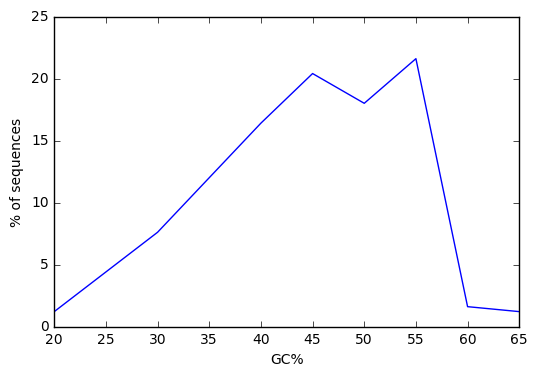

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

yt = []

x = np.asarray(sorted(hist))
for i in sorted(hist):
    yt.append(hist[i])
y = np.asarray(yt)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='GC%', ylabel='% of sequences')

plt.show()

fig.savefig("test.png")

### Another real life example:

#### Let us assume that each paired-end read we obtain from a sequencing experiment is in a bed file. We want to convert the reads into a genome browser track.

A bed file has the following format (https://genome.ucsc.edu/FAQ/FAQformat.html#format1):<br>

`chromosome    (start-1)    end    blah    blah    Strand`

Let us break it down into columns:
 - First Column: Chromosome
 - Second Column: (Start position - 1)
 - Third Column: End position
 - Fourth Column: Name
 - Fifth Column: Score
 - Sixth Column: Strand
 
In this example, we will ignore strand. For making a browser track, here is our strategy:

`123456789`<br>
`----_____`<br>
`___----__`<br>
`_____----`<br>
`______---`<br>
`______---`<br>
`111212433`<br>


In [41]:
read = {} #this will be the dictionary for our analysis
# Here is the dictionary structure:
# First level will be chromosome
# Second level will be genomic coordinate

bed_file = open('80mM_Ctl_sub.bed', 'r' ) #Open the fastq file
for line in bed_file: # Iterate through the fastq file
    line=line.rstrip() #get that pesky newline out
    
    #let us read in column values#####
    cols = line.split()
    chrom=cols[0].replace('chr','') #remove the pesky "chr" character from chromosome field
    st = int(cols[1])+1
    en = int(cols[2])
    ##########################
    
    read.setdefault(chrom,{}) #when reading a file, we haven't assigned any chromosome keys in our dictionary.
                              #setdefault makes a key if it doesn't exist
    #Fill in the reads here
    for i in range(st,en):
        read[chrom].setdefault(i,0)
        read[chrom][i]+=1
    
    #write the reads to a file
    fh = open("read_density.txt","w")
    for i in read:
        for j in sorted(read[i]):
            txt = str(i) + "\t" + str(j-1) + "\t" + str(j)+"\t"+ str(read[i][j]) + "\n"
            fh.write(txt)
    fh.close()

How does the track look? Let us try to plot it (we have a small region in this example)

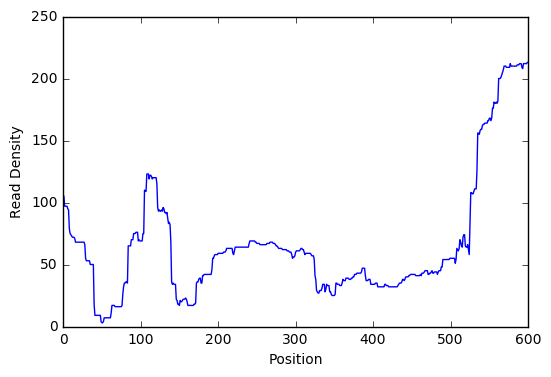

In [47]:
yt = []

x = np.asarray(sorted(read['2L']))
x = x - 21163511
for i in sorted(read['2L']):
    yt.append(read['2L'][i])
y = np.asarray(yt)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Position', ylabel='Read Density')

plt.show()

This is all fragment sizes. Can we get only nucleosomal size (134-160 bp), and transcription factor size (<50 bp)?

In [43]:
read_nuc = {} #this will be the dictionary for nucleosomes
read_tf  = {} #this will be the dictionary for transcription factors

# Here is the dictionary structure:
# First level will be chromosome
# Second level will be genomic coordinate

bed_file = open('80mM_Ctl_sub.bed', 'r' ) #Open the bed file
for line in bed_file: # Iterate through the fastq file
    line=line.rstrip() #get that pesky newline out
    
    #let us read in column values#####
    cols = line.split()
    chrom=cols[0].replace('chr','') #remove the pesky "chr" character from chromosome field
    st = int(cols[1])+1
    en = int(cols[2])
    fragment_length = en - st + 1
    
    ##########################
    
    #Fill in the reads here
    if(fragment_length <=50):
        for i in range(st,en):
            read_tf.setdefault(chrom,{})
            read_tf[chrom].setdefault(i,0)
            read_tf[chrom][i]+=1
    elif(fragment_length >=134 and fragment_length <= 160):    
        for i in range(st,en):
            read_nuc.setdefault(chrom,{})
            read_nuc[chrom].setdefault(i,0)
            read_nuc[chrom][i]+=1

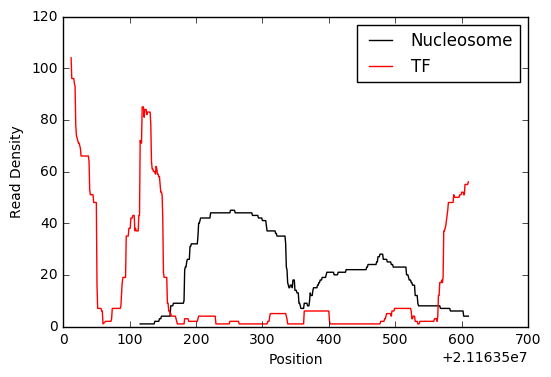

In [44]:
yt = []

x1 = np.asarray(sorted(read_nuc['2L']))
for i in sorted(read_nuc['2L']):
    yt.append(read_nuc['2L'][i])
y1 = np.asarray(yt)

yt = []

x2 = np.asarray(sorted(read_tf['2L']))
for i in sorted(read_tf['2L']):
    yt.append(read_tf['2L'][i])
y2 = np.asarray(yt)


fig, ax = plt.subplots()
ax.plot(x1, y1, color='black',label="Nucleosome")

ax.plot(x2, y2, color='red', label="TF")

ax.set(xlabel='Position', ylabel='Read Density')

plt.legend()

plt.show()

You now have a powerful toolset - you can open any text file with "fixed formatting" and process it to any extent you want. To what extent can you parse "fixed formatting"? Let us try the PDB format for biomolecular structures. This link has all entries for the PDB filetype: http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html. We will focus on "ATOM" entry:

`COLUMNS        DATA  TYPE    FIELD        DEFINITION`<br>
`-------------------------------------------------------------------------------------`
<br>
` 1 -  6        Record name   "ATOM  "
  7 - 11        Integer       serial       Atom  serial number.
 13 - 16        Atom          name         Atom name.
 17             Character     altLoc       Alternate location indicator.
 18 - 20        Residue name  resName      Residue name.
 22             Character     chainID      Chain identifier.
 23 - 26        Integer       resSeq       Residue sequence number.
 27             AChar         iCode        Code for insertion of residues.
 31 - 38        Real(8.3)     x            Orthogonal coordinates for X in Angstroms.
 39 - 46        Real(8.3)     y            Orthogonal coordinates for Y in Angstroms.
 47 - 54        Real(8.3)     z            Orthogonal coordinates for Z in Angstroms.
 55 - 60        Real(6.2)     occupancy    Occupancy.
 61 - 66        Real(6.2)     tempFactor   Temperature  factor.
 77 - 78        LString(2)    element      Element symbol, right-justified.
 79 - 80        LString(2)    charge       Charge  on the atom.`
 
I want to find out the number of contacts between Histone H3 (chain A) and DNA (chains I and J) in the nucleosome structure. I define a contact as two atoms within 6 Angstroms.

Here is how the "ATOM" records of a pdb file look:

`ATOM   5983  N   PRO A  38     -24.648 -21.095 -95.387  1.00185.45           N     
ATOM   5984  CA  PRO A  38     -23.718 -21.973 -94.638  1.00185.45           C     
ATOM   5985  C   PRO A  38     -22.626 -21.152 -93.954  1.00185.45           C     
ATOM   5986  O   PRO A  38     -21.595 -20.849 -94.557  1.00185.45           O     
ATOM   5987  CB  PRO A  38     -23.121 -22.938 -95.650  1.00153.83           C     
ATOM   5988  CG  PRO A  38     -23.205 -22.112 -96.936  1.00153.83           C     
ATOM   5989  CD  PRO A  38     -24.544 -21.368 -96.832  1.00153.83           C     
ATOM   5990  N   HIS A  39     -22.857 -20.799 -92.692  1.00162.21           N     
ATOM   5991  CA  HIS A  39     -21.901 -19.998 -91.932  1.00162.21           C     
ATOM   5992  C   HIS A  39     -20.987 -20.848 -91.060  1.00162.21           C     
ATOM   5993  O   HIS A  39     -21.430 -21.821 -90.448  1.00162.21           O     
ATOM   5994  CB  HIS A  39     -22.645 -18.977 -91.068  1.00161.49           C     
ATOM   5995  CG  HIS A  39     -21.741 -18.066 -90.297  1.00161.49           C     
ATOM   5996  ND1 HIS A  39     -21.353 -18.324 -89.000  1.00161.49           N     
ATOM   5997  CD2 HIS A  39     -21.131 -16.910 -90.650  1.00161.49           C     
ATOM   5998  CE1 HIS A  39     -20.545 -17.365 -88.587  1.00161.49           C     
ATOM   5999  NE2 HIS A  39     -20.393 -16.495 -89.570  1.00161.49           N     
ATOM   6000  N   ARG A  40     -19.713 -20.460 -90.997  1.00107.16           N     
ATOM   6001  CA  ARG A  40     -18.709 -21.191 -90.226  1.00107.16           C     
ATOM   6002  C   ARG A  40     -17.524 -20.290 -89.859  1.00107.16           C     
ATOM   6003  O   ARG A  40     -16.983 -19.596 -90.720  1.00107.16           O     
ATOM   6004  CB  ARG A  40     -18.216 -22.370 -91.061  1.00 98.76           C
ATOM   6005  CG  ARG A  40     -17.519 -23.463 -90.292  1.00 98.76           C
ATOM   6006  CD  ARG A  40     -16.929 -24.456 -91.268  1.00 98.76           C
ATOM   6007  NE  ARG A  40     -16.472 -25.676 -90.620  1.00 98.76           N
ATOM   6008  CZ  ARG A  40     -17.253 -26.467 -89.896  1.00 98.76           C
ATOM   6009  NH1 ARG A  40     -18.532 -26.152 -89.724  1.00 98.76           N
ATOM   6010  NH2 ARG A  40     -16.762 -27.582 -89.366  1.00 98.76           N`

In [48]:
histone_x = {} #this will be the dictionary for x coordinate of protein (chain A)
histone_y = {}
histone_z = {}
dna_x  = {} #this will be the dictionary for x coordinate of DNA (chain I and J)
dna_y  = {}
dna_z  = {}

pdb_file = open('1id3.pdb', 'r' ) #Open the pdb file
for line in pdb_file:
    if line.startswith('ATOM'):
        resid = line[22:26] #get the residue number
        resid = resid.replace(" ","") #get rid of all spaces in the residue number
        atom = line[12:16] #get the atom name
        atom = atom.replace(" ","") #get rid of all spaces in atom name
        chain = line[21]
        key = chain+"_"+resid+"_"+atom #make a unique key for that atom
        if line[21] == 'A': #histone H3 chain
            histone_x[key] = float(line[30:38]) #getting the x coordinate
            histone_y[key] = float(line[38:46])
            histone_z[key] = float(line[46:55])
            #print(key+" "+str(histone_x[key]),histone_y[key],histone_z[key])
        if chain == 'I': #or chain == 'J': #DNA chains
            dna_x[key] = float(line[30:38])
            dna_y[key] = float(line[38:46])
            dna_z[key] = float(line[46:55])
            #print(key+" "+str(dna_x[key]),dna_y[key],dna_z[key])
pdb_file.close()

h3_contact_count = {}
dna_contact_count = {}

for i in histone_x:
    broken_key = i.split("_")
    h3_resid = int(broken_key[1])
    for j in dna_x:
        broken_key = j.split("_")
        dna_resid = int(broken_key[1])
        #if not resid in contact_count:
        #    contact_count[resid] = 0
        dist = ( (histone_x[i] - dna_x[j])**2 + (histone_y[i] - dna_y[j])**2 + (histone_z[i] - dna_z[j] )**2 )  ** 0.5
        if(dist <= 6):
            ########## Count H3 Contacts ########
            if h3_resid in h3_contact_count:
                h3_contact_count[h3_resid]+=1
            else:
                h3_contact_count[h3_resid] = 1
            ######## Count DNA contacts #########
            if dna_resid in dna_contact_count:
                dna_contact_count[dna_resid]+=1
            else:
                dna_contact_count[dna_resid] = 1

In [49]:
print("DNA Contacts")
for i in sorted(dna_contact_count):                
    print(i,dna_contact_count[i])

print("H3 Contacts")
for i in sorted(h3_contact_count):                
    print(i,h3_contact_count[i])

DNA Contacts
49 4
50 159
51 102
59 25
60 16
64 2
65 13
66 3
67 49
68 51
69 34
70 113
71 29
143 57
144 130
145 29
H3 Contacts
38 5
39 12
40 46
41 65
42 96
43 74
45 34
49 2
52 3
61 1
63 40
68 4
72 22
82 3
83 119
84 50
85 46
86 18
87 2
89 1
115 7
116 62
117 40
118 36
120 25
122 3


[ 49  50  51  59  60  64  65  66  67  68  69  70  71 143 144 145]


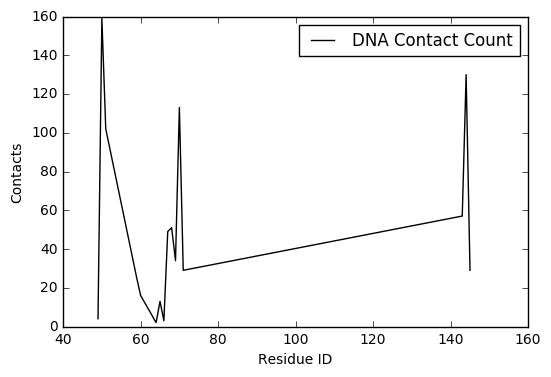

In [50]:
yt = []

x1 = np.asarray(sorted(dna_contact_count))
for i in sorted(dna_contact_count):
    yt.append(dna_contact_count[i])
y1 = np.asarray(yt)

print(x1)

fig, ax = plt.subplots()
ax.plot(x1, y1, color='black',label="DNA Contact Count")

ax.set(xlabel='Residue ID', ylabel='Contacts')

plt.legend()

plt.show()

## Assignment

A wig format is used for genome coverage of a dataset. The declaration line starts with the word variableStep and is followed by a specification for a chromosome. Ignore the optional span parameter for now. You have to write the code to read the "80mM_Ctl_sub.wig" file and then print out the coverage as follows:

Chromosome Position Value

In [ ]:
# write code here

For the fastq file that we worked on, calculate the GC content at each position of the read. Here is a demo:

`sequence 1: ATGCATGC
sequence 2: GAGAGCTA`

First position is 50% GC, second position is 0% GC and so on.

In [ ]:
# write code here

Read a uniprot text file "HistoneH3_Uniprot.txt". Write code to extract subcellular localization and the amino acid sequence from the uniprot file.

In [ ]:
# write code here

In the pdb file we worked with, for each Lysine residue (LYS) in chain A, find the closest DNA residue (only in chain I). The output should be as follows:

Residue_ID Residue_Name (should be LYS) closest to Residue_ID Residue_Name

In [ ]:
# write code here